In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc


import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


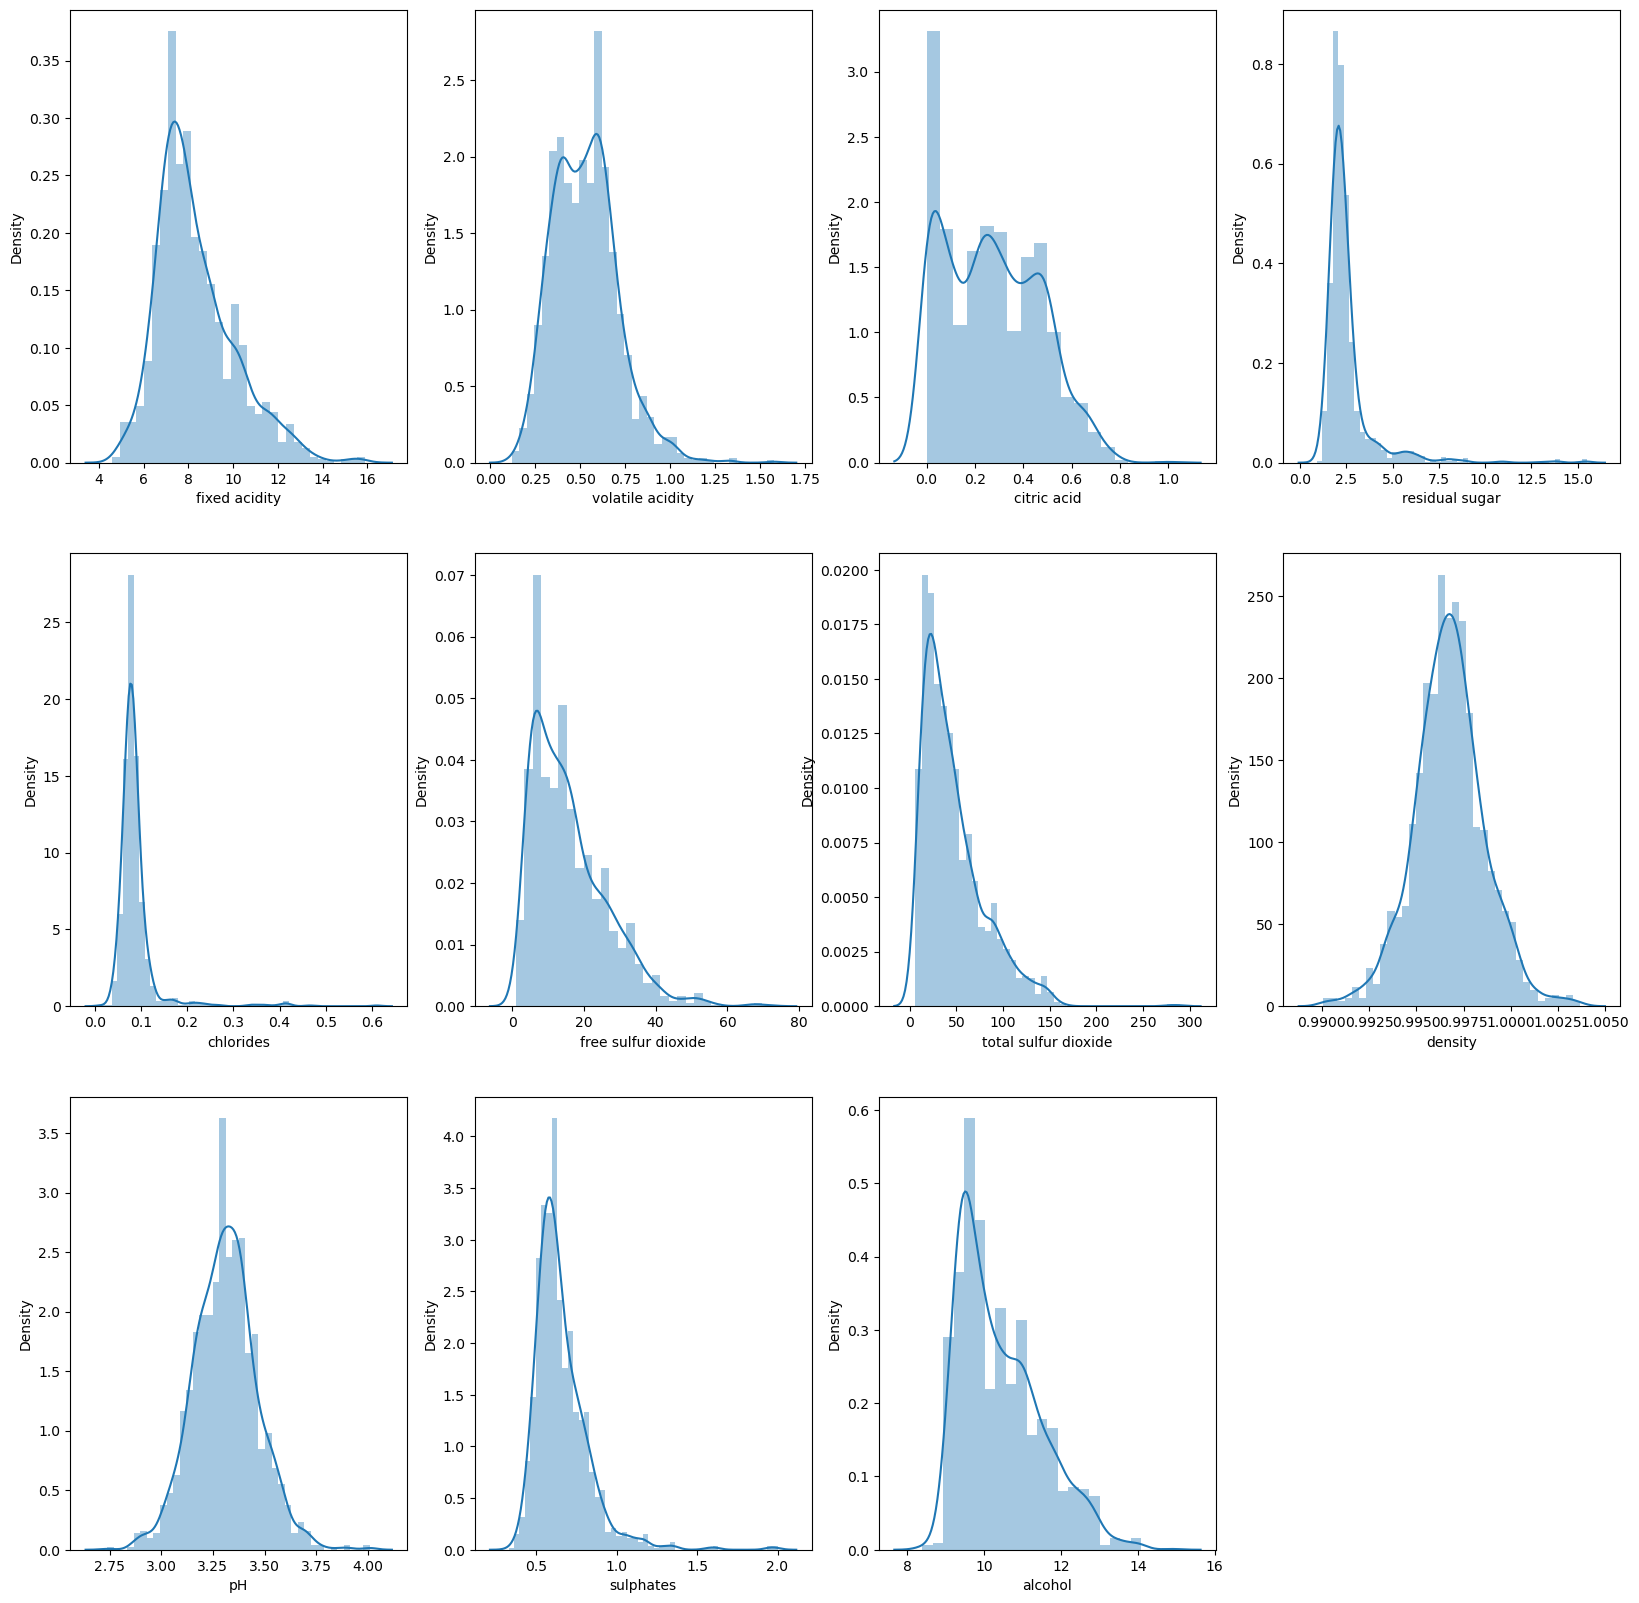

In [6]:
plt.figure(figsize=(20, 20), facecolor='white')

plotnumber = 1
for i in df:
    if plotnumber >= 12:
        break
    ax = plt.subplot(3, 4, plotnumber)
    sns.distplot(df[i])
    plotnumber += 1

plt.show()

# for visual

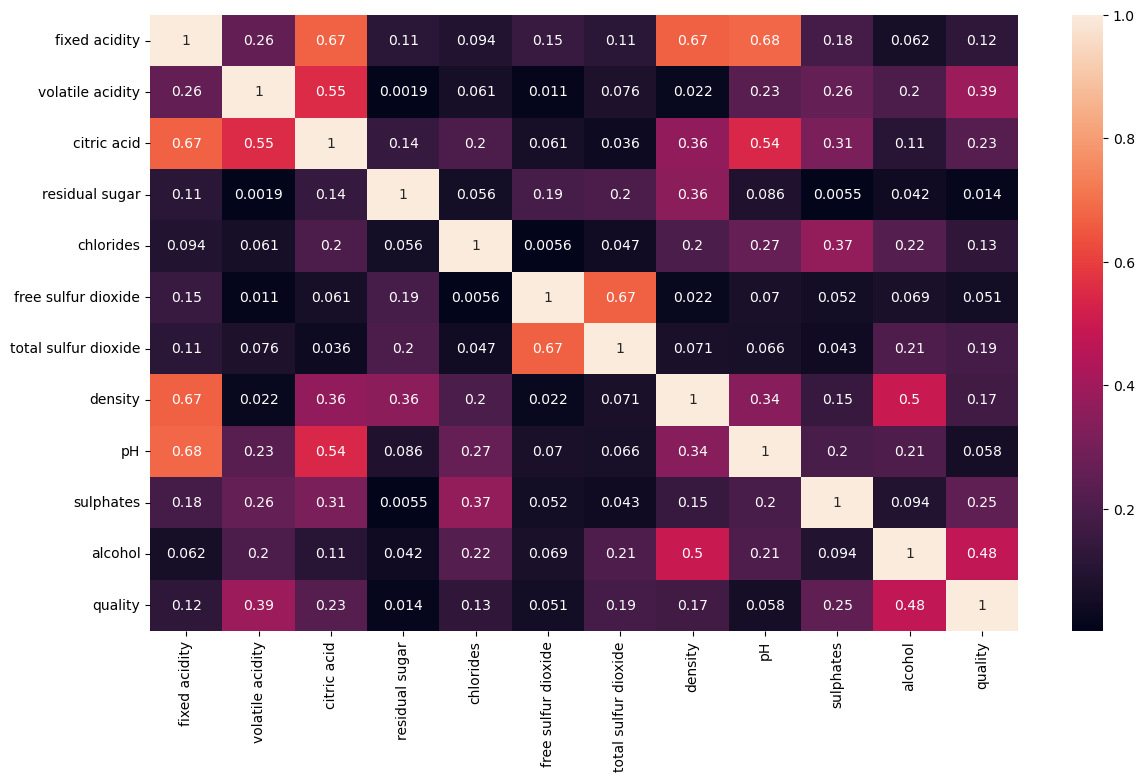

In [7]:
# heatmap to identify correlation/multicollinearity

df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 10})
plt.show()

In [8]:
# Split the data into input features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# define the cutoff for 'good' and 'not good' wine
cutoff = 7
y = np.where(y >= cutoff, 1, 0)

In [9]:
# spliting the data
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=41)

In [10]:
# fuction to recall

def metric_score(clf, x_train, x_test, y_train,y_test , train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n**************Train Result***************')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print('\n************Test Result**************')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:2f}%')
        
        print('\n \n Test Classification Report \n \n', classification_report(y_test, pred, digits=2))

In [11]:
# Creating a decision tree classifier
clf = DecisionTreeClassifier()

# training the classifier
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) #training score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) #testing score


**************Train Result***************
Accuracy Score: 100.00%

************Test Result**************
Accuracy Score: 86.750000%

 
 Test Classification Report 
 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       339
           1       0.56      0.61      0.58        61

    accuracy                           0.87       400
   macro avg       0.74      0.76      0.75       400
weighted avg       0.87      0.87      0.87       400



In [13]:
y_pred = clf.predict(x_test)

#creating confusion matrix
confusion_matrix(y_test,y_pred)

array([[310,  29],
       [ 24,  37]], dtype=int64)

In [14]:
grid_para = {'criterion': ['gini', 'entropy'],
            'max_depth' : range(6,20),
            'min_samples_leaf': range(2,6),
            'min_samples_split' : range(3,8),
            'max_leaf_nodes' : range(5,10)
            }

In [15]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid= grid_para,
                          cv=5,
                          n_jobs=-1)

In [16]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [17]:
# best parameters for tunning
best_para = grid_search.best_params_
print(best_para)

{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [18]:
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=3,max_depth=6,min_samples_leaf=2)

#train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=3)

In [19]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) #training score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) #testing score


**************Train Result***************
Accuracy Score: 92.83%

************Test Result**************
Accuracy Score: 86.500000%

 
 Test Classification Report 
 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       339
           1       0.57      0.49      0.53        61

    accuracy                           0.86       400
   macro avg       0.74      0.71      0.72       400
weighted avg       0.86      0.86      0.86       400



Accuracy: 0.865
AUC: 0.7119783355094541


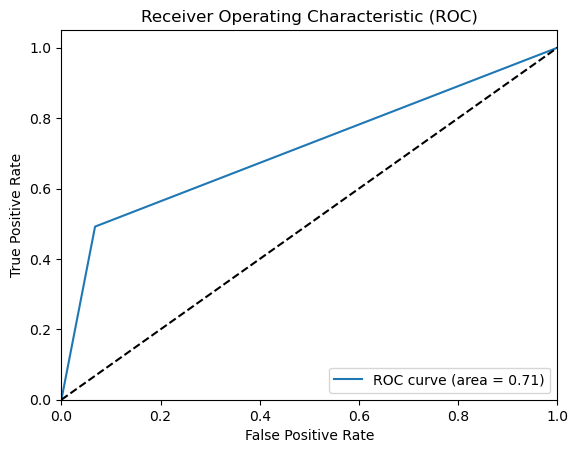

In [20]:
# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the false positive rate (fpr), true positive rate (tpr), and area under the curve (AUC)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_value = auc(fpr, tpr)
print("AUC:", auc_value)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [21]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,